In [2]:
import matplotlib.pyplot as plt

from src.model import tf_dense,tf_lstm
from src.preprocess import load_dataset, window_sliding
from src.trainer import SKLTrainer,TFTrainer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from src.configuration import SAVE_PLOT,ROOT_DIR

In [3]:
def NaiveBayes_session():
    data, label = load_dataset('df')
    data = StandardScaler().fit_transform(data)
    data = Normalizer().fit_transform(data)
    trainer = SKLTrainer(model=CategoricalNB(),
                         data=data,
                         label=label,
                         name="Naive Bayes")
    trainer.fit()
    score = trainer.evaluate()
    trainer.plot_confusion_matrix()

    return score

In [4]:
def DecisionTree_session():
    data, label = load_dataset('df')
    data = StandardScaler().fit_transform(data)
    trainer = SKLTrainer(model=DecisionTreeClassifier(),
                         data=data,
                         label=label,
                         name="Decision Tree")
    trainer.fit()
    score = trainer.evaluate()
    trainer.plot_confusion_matrix()
    return score

In [5]:
def RandomForest_session():
    data, label = load_dataset('df')
    data = StandardScaler().fit_transform(data)
    trainer = SKLTrainer(model=RandomForestClassifier(max_depth=2),
                         data=data,
                         label=label,
                         name="Random Forest")
    trainer.fit()
    score = trainer.evaluate()
    trainer.plot_confusion_matrix()
    return score

In [6]:
def SVC_session():
    data, label = load_dataset('df')
    data = StandardScaler().fit_transform(data)
    trainer = SKLTrainer(model=SVC(gamma='auto'),
                         data=data,
                         label=label,
                         name="SVC")
    trainer.fit()
    score = trainer.evaluate()
    trainer.plot_confusion_matrix()
    return score

In [7]:
def Dense_session():
    data, label = load_dataset('np')
    trainer = TFTrainer(model_fn=tf_dense,
                        data=data,
                        label=label,
                        name="Dense",
                        epochs=10,
                        test_size=0.15,
                        batch_size=8)
    trainer.fit()
    trainer.plot_history()
    score = trainer.evaluate()
    trainer.plot_confusion_matrix()
    return score

In [8]:
def LSTM_session():
    data, label = load_dataset('np')
    data = window_sliding(data,window_size=20,stride=5)
    trainer = TFTrainer(model_fn=tf_lstm,
                        data=data,
                        label=label,
                        name="LSTM",
                        epochs=10,
                        test_size=0.15,
                        batch_size=8)
    trainer.fit()
    trainer.plot_history()
    score = trainer.evaluate()
    trainer.plot_confusion_matrix()
    return score

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 397, 80)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               107008    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 520       
Total params: 119,944
Trainable params: 119,944
Non-trainable params: 0
________________________________________________

136/136 [==============================] - 9s 65ms/sample - loss: 2.1296 - accuracy: 0.2353 - val_loss: 1.8191 - val_accuracy: 0.4167
Epoch 2/10
136/136 [==============================] - 6s 43ms/sample - loss: 1.5086 - accuracy: 0.6103 - val_loss: 1.3631 - val_accuracy: 0.6667
Epoch 3/10
136/136 [==============================] - 5s 39ms/sample - loss: 1.0684 - accuracy: 0.8529 - val_loss: 1.0623 - val_accuracy: 0.7917
Epoch 4/10
136/136 [==============================] - 5s 39ms/sample - loss: 0.7569 - accuracy: 0.9926 - val_loss: 0.8614 - val_accuracy: 0.8333
Epoch 5/10
136/136 [==============================] - 5s 39ms/sample - loss: 0.5332 - accuracy: 0.9926 - val_loss: 0.6740 - val_accuracy: 0.9583
Epoch 6/10
136/136 [==============================] - 5s 39ms/sample - loss: 0.3773 - accuracy: 1.0000 - val_loss: 0.5327 - val_accuracy: 0.9583
Epoch 7/10
136/136 [==============================] - 6s 42ms/sample - loss: 0.2798 - accuracy: 1.0000 - val_loss: 0.4460 - val_accuracy: 1.0

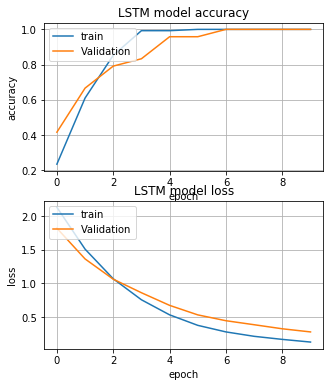

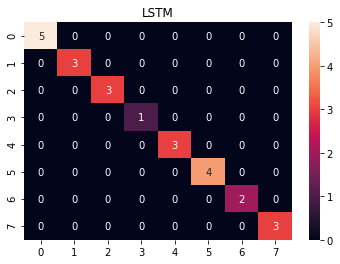

Train on 136 samples, validate on 24 samples
Epoch 1/10


136/136 [==============================] - 1s 11ms/sample - loss: 43.8067 - accuracy: 0.2574 - val_loss: 32.0772 - val_accuracy: 0.3333
Epoch 2/10
136/136 [==============================] - 0s 1ms/sample - loss: 7.7671 - accuracy: 0.6618 - val_loss: 4.3031 - val_accuracy: 0.7500
Epoch 3/10
136/136 [==============================] - 0s 1ms/sample - loss: 1.5892 - accuracy: 0.8676 - val_loss: 2.5220 - val_accuracy: 0.8750
Epoch 4/10
136/136 [==============================] - 0s 1ms/sample - loss: 0.1811 - accuracy: 0.9779 - val_loss: 1.5757 - val_accuracy: 0.9167
Epoch 5/10
136/136 [==============================] - 0s 1ms/sample - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.3519 - val_accuracy: 0.9167
Epoch 6/10
136/136 [==============================] - 0s 1ms/sample - loss: 2.3790e-04 - accuracy: 1.0000 - val_loss: 1.3229 - val_accuracy: 0.9167
Epoch 7/10
136/136 [==============================] - 0s 1ms/sample - loss: 3.1822e-04 - accuracy: 1.0000 - val_loss: 1.3238 - val_accuracy:

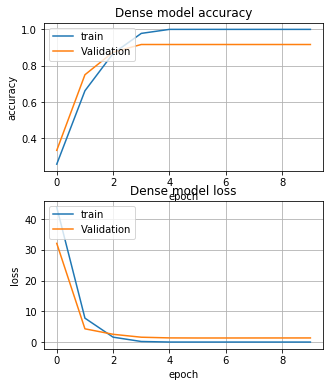

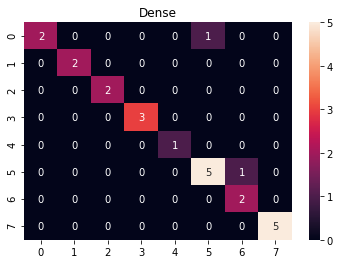

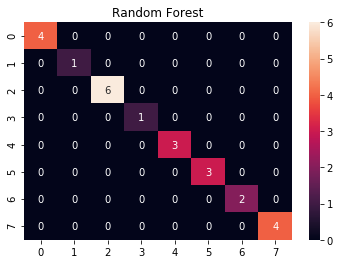

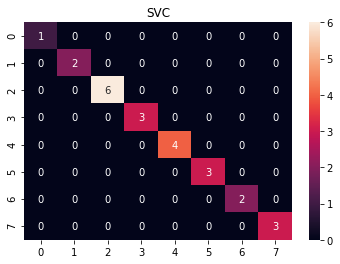

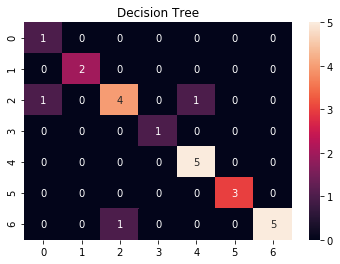

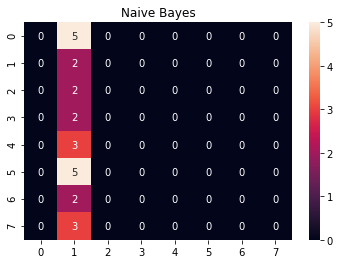

[1.0, 0.9166666666666666, 1.0, 1.0, 0.875, 0.08333333333333333]


In [10]:
if __name__ =='__main__':
    test_scores = [LSTM_session(),
                   Dense_session(),
                   RandomForest_session(),
                   SVC_session(),
                   DecisionTree_session(),
                   NaiveBayes_session()]

    print(test_scores)


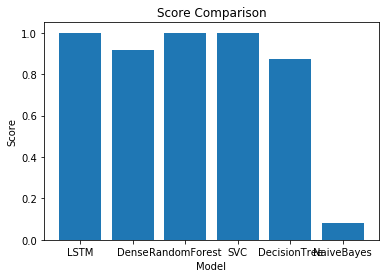

In [12]:
plt.bar(["LSTM","Dense","RandomForest","SVC","DecisionTree","NaiveBayes"],test_scores)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Score Comparison")
if SAVE_PLOT:
    plt.savefig(ROOT_DIR/"documentation"/ "Score_comparison.png",dpi=300)
plt.show()